In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Data Train Load dataset
data = pd.read_csv("/home/systemcommand/anggy/app/data/dataanggy.csv", delimiter=',')
data.head()

,T,B,SU1,SU2,RT1,RT2,RT3,RT4,I1,I2,N1,N2,N3,J
0,2017,Januari,14835.0,18172.0,14183.0,24728.0,841756.0,201048.0,46800.0,39938.0,56324.0,32492.0,5994.0,1296270.0
1,2017,Februari,14893.0,19026.0,14371.0,24394.0,832284.0,200774.0,47536.0,37282.0,57218.0,31412.0,5329.0,1284519.0
2,2017,Maret,13676.0,17706.0,13864.0,23071.0,789354.0,197318.0,41005.0,35755.0,55068.0,30468.0,5737.0,1223022.0
3,2017,April,15780.0,20222.0,15791.0,26153.0,893393.0,224847.0,47793.0,38759.0,63590.0,34198.0,6926.0,1387452.0
4,2017,Mei,15698.0,17508.0,14863.0,24681.0,851205.0,222635.0,45794.0,37655.0,60998.0,26452.0,5915.0,1323404.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       36 non-null     int64  
 1   B       36 non-null     object 
 2   SU1     36 non-null     float64
 3   SU2     36 non-null     float64
 4   RT1     36 non-null     float64
 5   RT2     36 non-null     float64
 6   RT3     36 non-null     float64
 7   RT4     36 non-null     float64
 8   I1      36 non-null     float64
 9   I2      36 non-null     float64
 10  N1      36 non-null     float64
 11  N2      36 non-null     float64
 12  N3      36 non-null     float64
 13  J       36 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 4.1+ KB


In [4]:
# EDA/ data description
this = data.copy()
this.describe()

,T,SU1,SU2,RT1,RT2,RT3,RT4,I1,I2,N1,N2,N3,J
count,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,2018.000000,16811.762626,18289.593434,17319.497475,25285.578283,8.746521e+05,268326.891414,51928.075758,43835.411616,65745.484848,33214.449495,6299.679293,1.421709e+06
std,0.828079,1716.505834,1344.417407,2018.962672,1090.830689,5.313820e+04,36903.007764,4780.094874,5577.029476,6169.312152,3650.208830,535.692608,1.063310e+05
min,2017.000000,13676.000000,15291.000000,13584.000000,22892.000000,7.741400e+05,197318.000000,41005.000000,33836.000000,54898.000000,23525.000000,5329.000000,1.223022e+06
25%,2017.000000,15665.500000,17628.000000,15844.250000,24706.500000,8.443638e+05,239055.750000,48611.000000,39885.000000,61232.000000,30393.000000,5906.000000,1.343209e+06
50%,2018.000000,16859.000000,18305.500000,17569.500000,25380.000000,8.676585e+05,270760.000000,52107.500000,43078.500000,65386.000000,33711.000000,6153.000000,1.413994e+06
75%,2019.000000,17664.750000,19032.500000,18850.227273,25993.250000,9.015332e+05,296272.500000,54216.250000,47648.250000,71050.863636,36266.545455,6847.750000,1.486746e+06
max,2019.000000,21841.000000,21044.000000,21566.000000,27466.000000,1.022240e+06,336887.000000,64193.000000,56427.000000,79014.000000,38926.000000,7422.000000,1.677296e+06


In [5]:
# Preprocessing
train = this.drop(['T','B'],axis=1)

# Preprocessing/ transform(normalizing)
scaler = preprocessing.MinMaxScaler().fit(train)
data_train = scaler.transform(train)

In [6]:
# Selecting Variables
datax = []
for i in range(len(data_train)):
    tes = data_train[i][:11]
    datax.append(tes)

datay = []
for i in range(len(data_train)):
    tes = data_train[i][-1]
    datay.append(tes)

x = np.array(datax,np.float32)
y = np.array(datay,np.float32)

print(x.shape)

(36, 11)


In [7]:
# Define parameters
n = x.shape[1]
m = 5
M = 1
init_arr_item = 0.0

learning_rate = 0.001
TRAIN_ITER = 8900

In [8]:
# Make Placeholder 
w = np.ones([m,n], np.float32)*init_arr_item
v = np.ones([M,m], np.float32)*init_arr_item
b_j = np.zeros([m], np.float32)*init_arr_item
b_k = np.zeros([M], np.float32)*init_arr_item

z_pred = np.zeros([y.shape[0], m], np.float32)
y_pred = np.zeros([y.shape[0], M], np.float32)
E = np.zeros(M, np.float32)

v_new = np.zeros([M,m], np.float32)
delta_k = np.zeros(M, np.float32)

w_new = np.zeros([m,n], np.float32)
delta_j = np.zeros(m, np.float32)

In [9]:
# Define Sigmoid activation function
def f_sigmoid(value):
    return 1.0/(1.0+np.exp(-value))

def f_sigmoid_derivation(value):
    return f_sigmoid(value)*(1-f_sigmoid(value))
  
# Define Linear activation function
def f_linear(value):
    return value

def f_linear_derivation(value):
    return np.ones(value.shape, np.float32)
  
# Hidden Layer activation function wrapper
def f_activation(value):
    return f_sigmoid(value)
  
def f_activation_derivation(value):
    return f_sigmoid_derivation(value)

# Output Layer activation function wrapper
def f_activation_output(value):
    return f_linear(value)

def f_activation_derivation_output(value):
    return f_linear_derivation(value)

In [10]:
# Feed Forward
def calc_z_j(x_train, w_train, b_j_train):
    for j in range(m):
        z_pred[:,j] = np.dot(x_train,w_train[j,:]) + b_j_train[j]
    
    return z_pred
    
def calc_y_k(z_train, v_train, b_k_train):
    for k in range(M):
        y_pred[:,k] = np.dot(z_train, v_train[k,:]) + b_k_train[k]
    
    return y_pred

In [11]:
# Calculate Loss
def error_calc(target, output):
    for k in range(M):
        E[k] = 0.5*(target[k] - output[k])**2
    return np.sum(E)

In [12]:
# Backpropagation
def calc_v_new(v_last, y, y_prediction, z_prediction):
    delta_k = np.transpose(f_activation_derivation_output(y_prediction)*(np.reshape(y, (y.shape[0], 1)) - y_prediction))
        
    for j in range(m):
        v_new[:,j] = v_last[:,j] + learning_rate*np.dot(delta_k,z_prediction[:,j])
            
    return v_new, delta_k


def calc_w_new(w_last, v_new, delta_k, z_prediction, x_input):
    sum_v = np.dot(np.transpose(v_new), delta_k)
    
    delta_j = np.transpose(f_activation_derivation(z_prediction))*sum_v
    
    for i in range(n):
            w_new[:,i] = w_last[:,i] + learning_rate*np.dot(delta_j,x_input[:,i])
            
    return w_new, delta_j
    
def calc_b_k_new(delta_k, b_k_last):
    return b_k_last +  learning_rate*np.sum(delta_k)

def calc_b_j_new(delta_j, b_j_last):
    return b_j_last + learning_rate*np.sum(delta_j)

In [13]:
# RMSE
def rmse(predictions, targets):
    return 100 - np.sqrt(((predictions - targets) ** 2).mean())

In [14]:
# Train Model
def train_model(train_count, w_train, v_train, b_j_train, b_k_train, y_train, x_train):
    index = []
    error = []
    for l in range(train_count):
        z_prediction = calc_z_j(x_train, w_train, b_j_train)
        z_prediction = f_activation(z_prediction)
        
        y_prediction = calc_y_k(z_prediction, v_train, b_k_train)
        y_prediction = f_activation_output(y_prediction)
        
        v_train, delta_k = calc_v_new(v_train, y_train, y_prediction, z_prediction)
        w_train, delta_j = calc_w_new(w_train, v_train, delta_k, z_prediction, x_train)
        
        b_k_train = calc_b_k_new(delta_k, b_k_train)
        b_j_train = calc_b_j_new(delta_j, b_j_train)
        
        rms = rmse(y_prediction, y_train)
        
        loss = error_calc(y_train, y_prediction)

        if l % 100 == 0:
            error.append(loss)
            index.append(l)
            print("Iterasi ke-" + str(l) + " Error : " + str(loss))
            
        if loss == 0.0001:
            break
        
    plt.figure()
    plt.plot(index, error)
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    
    print('-'*30)
    print('TRAINING MODEL')
    print('-'*30)
    print('\nOutput prediksi hidden layer : ')
    print('-'*30)
    print(z_prediction)
    print('\nOutput prediksi output layer : ')
    print('-'*30)
    print(y_prediction)
    print('\nOutput bobot dari hidden layer ke output layer : ')
    print('-'*30)
    print(v_train)
    print('\nOutput bobot dari input layer ke hidden layer : ')
    print('-'*30)
    print(w_train)
    print('\nOutput bias dari hidden layer ke output layer : ')
    print('-'*30)
    print(b_k_train)
    print('\nOutput bias dari input layer ke hidden layer : ')
    print('-'*30)
    print(b_j_train)
    print('-'*30)
    print()
    print('-'*30)
    print('AKURASI : ' + str(rms) + '%')
    print('-'*30)
    return v_train, w_train, b_k_train, b_j_train

Iterasi ke-0 Error : 0.012999473
Iterasi ke-100 Error : 0.037952293
Iterasi ke-200 Error : 0.037790656
Iterasi ke-300 Error : 0.037596643
Iterasi ke-400 Error : 0.03738573
Iterasi ke-500 Error : 0.037151594
Iterasi ke-600 Error : 0.036888067
Iterasi ke-700 Error : 0.03658901
Iterasi ke-800 Error : 0.03624836
Iterasi ke-900 Error : 0.035860106
Iterasi ke-1000 Error : 0.03541834
Iterasi ke-1100 Error : 0.034917414
Iterasi ke-1200 Error : 0.034352027
Iterasi ke-1300 Error : 0.033717338
Iterasi ke-1400 Error : 0.033009212
Iterasi ke-1500 Error : 0.032224424
Iterasi ke-1600 Error : 0.03136073
Iterasi ke-1700 Error : 0.030417247
Iterasi ke-1800 Error : 0.029394513
Iterasi ke-1900 Error : 0.028294636
Iterasi ke-2000 Error : 0.027121447
Iterasi ke-2100 Error : 0.025880497
Iterasi ke-2200 Error : 0.024579043
Iterasi ke-2300 Error : 0.02322602
Iterasi ke-2400 Error : 0.021831792
Iterasi ke-2500 Error : 0.020407958
Iterasi ke-2600 Error : 0.018967068
Iterasi ke-2700 Error : 0.017522363
Iterasi ke

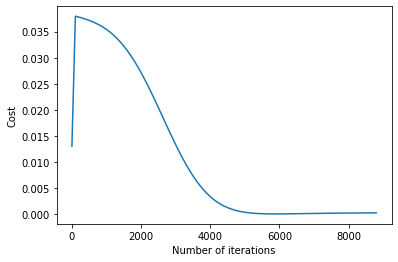

------------------------------
TRAINING MODEL
------------------------------

Output prediksi hidden layer : 
------------------------------
[[0.49229896 0.49229896 0.49229896 0.49229896 0.49229902]
 [0.4880514  0.4880514  0.4880514  0.4880514  0.4880514 ]
 [0.41841748 0.41841748 0.41841748 0.41841748 0.41841757]
 [0.5861329  0.5861329  0.5861329  0.5861329  0.58613294]
 [0.5097934  0.5097934  0.5097934  0.5097934  0.5097934 ]
 [0.48306414 0.48306414 0.48306414 0.48306414 0.48306414]
 [0.56395537 0.56395537 0.56395537 0.56395537 0.5639555 ]
 [0.5492917  0.5492917  0.5492917  0.5492917  0.5492918 ]
 [0.6431801  0.6431801  0.6431801  0.6431801  0.64318013]
 [0.4638112  0.4638112  0.4638112  0.4638112  0.4638112 ]
 [0.6235436  0.6235436  0.6235436  0.6235436  0.6235437 ]
 [0.5601643  0.5601643  0.5601643  0.5601643  0.5601643 ]
 [0.53675485 0.53675485 0.53675485 0.53675485 0.53675485]
 [0.5883428  0.5883428  0.5883428  0.5883428  0.58834285]
 [0.56237257 0.56237257 0.56237257 0.56237257 0

In [15]:
# Call function 
v, w, b_k, b_j = train_model(TRAIN_ITER, w, v, b_j, b_k, y, x)

In [16]:
# Test Model
def test(x_test, y_test, w, v,  b_j, b_k):
    z_prediction = np.dot(x_test, np.transpose(w)) + b_j
    f_z_prediction = f_activation(z_prediction)
    
    y_prediction = np.dot(f_z_prediction, np.transpose(v)) + b_k
    f_y_prediction =  f_activation_output(y_prediction)
    
    rms = rmse(f_y_prediction, y_test)
    
    print('-'*30)
    print('TESTING MODEL')
    print('-'*30)
    print('\nOutput prediksi hidden layer : ')
    print('-'*30)
    print(z_prediction)
    print('\nOutput prediksi output layer : ')
    print('-'*30)
    print(y_prediction)
    print('\nOutput bobot dari hidden layer ke output layer : ')
    print('-'*30)
    print(v)
    print('\nOutput bobot dari input layer ke hidden layer : ')
    print('-'*30)
    print(w)
    print('\nOutput bias dari hidden layer ke output layer : ')
    print('-'*30)
    print(b_k)
    print('\nOutput bias dari input layer ke hidden layer : ')
    print('-'*30)
    print(b_j)
    print('-'*30)
    print()
    print('-'*30)
    print('AKURASI : ' + str(rms) + '%')
    print('-'*30)
    return f_y_prediction

In [17]:
# Call function
y_prediction_test = np.zeros(len(x), np.float32)
y_prediction_test = test(x, y, w, v,  b_j, b_k)

------------------------------
TESTING MODEL
------------------------------

Output prediksi hidden layer : 
------------------------------
[[-0.03081557 -0.03081557 -0.03081557 -0.03081557 -0.03081542]
 [-0.04780594 -0.04780594 -0.04780594 -0.04780594 -0.04780573]
 [-0.32928005 -0.32928005 -0.32928005 -0.32928005 -0.32928002]
 [ 0.34799007  0.34799007  0.34799007  0.34799007  0.34799036]
 [ 0.03917453  0.03917453  0.03917453  0.03917453  0.03917471]
 [-0.06777278 -0.06777278 -0.06777278 -0.06777278 -0.06777263]
 [ 0.2572253   0.2572253   0.2572253   0.2572253   0.2572256 ]
 [ 0.19780019  0.19780019  0.19780019  0.19780019  0.19780043]
 [ 0.5891794   0.5891794   0.5891794   0.5891794   0.58917975]
 [-0.145008   -0.145008   -0.145008   -0.145008   -0.14500788]
 [ 0.50461185  0.50461185  0.50461185  0.50461185  0.5046121 ]
 [ 0.24182263  0.24182263  0.24182263  0.24182263  0.24182287]
 [ 0.14728013  0.14728013  0.14728013  0.14728013  0.1472803 ]
 [ 0.35711357  0.35711357  0.35711357  0.

In [18]:
# Denormalize prediction
j = data['J']
denorm = []
for i in range(len(data)):
    y[i] = y_prediction_test[i] * (j.max(axis=0) - j.min(axis=0)) + j.min(axis=0) 
    denorm.append(y[i])
print(denorm)

[1286989.5, 1282481.2, 1208543.1, 1386621.4, 1305566.4, 1277185.5, 1363075.0, 1347504.2, 1447193.5, 1256743.9, 1426345.9, 1359049.4, 1334193.8, 1388969.5, 1361394.0, 1430906.0, 1403886.2, 1457051.1, 1280300.5, 1434877.0, 1505143.4, 1436031.1, 1512070.8, 1489713.2, 1495151.6, 1497164.9, 1430447.8, 1504612.8, 1524959.5, 1604347.5, 1371109.9, 1566562.4, 1512582.6, 1520923.0, 1626008.8, 1547614.1]


In [19]:
dict_b = {
    'Januari' : 1,
    'Februari' : 2,
    'Maret' : 3,
    'April' : 4,
    'Mei' : 5,
    'Juni' : 6,
    'Juli' : 7,
    'Agustus' : 8,
    'September' : 9,
    'Oktober' : 10,
    'November' : 11,
    'Desember' : 12
}

# encoding from string to binary
data['B'] = data['B'].apply(lambda x : dict_b[x])

In [20]:
df1 = data.loc[:,['T']].values
df2 = data.loc[:,['B']].values

df11 = df1.astype(str)
df22 = df2.astype(str)
dff1 = df11.flatten()
dff2 = df22.flatten()
dff= []
for i in range(len(dff1)):
    dffi = dff1[i] +"-"+ dff2[i]
    dff.append(dffi)
print(dff)

['2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6', '2017-7', '2017-8', '2017-9', '2017-10', '2017-11', '2017-12', '2018-1', '2018-2', '2018-3', '2018-4', '2018-5', '2018-6', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12', '2019-1', '2019-2', '2019-3', '2019-4', '2019-5', '2019-6', '2019-7', '2019-8', '2019-9', '2019-10', '2019-11', '2019-12']


In [21]:
# Output prediction File
submission = pd.DataFrame({
    "Time" : dff,
    "Truth" : data['J'],
    "Prediction": denorm
    })

submission.head(5)

# Export it in a 'Comma Separated Values' (CSV) file
submission.to_csv(r'/home/systemcommand/anggy/app/data/result.csv', index=False)
# Creating a link to download the .csv file we created
from IPython.display import FileLink
FileLink(r'/home/systemcommand/anggy/app/data/result.csv')

/home/systemcommand/anggy/app/data/result.csv

In [22]:
# # Plot prediction and truth data
# dataa = pd.read_csv('/home/systemcommand/anggy/app/data/result.csv')

# x = dataa['Truth']
# x2 = dataa['Prediction']
# y = dataa['Bulan']

# plt.figure(figsize=(16,8))
# plt.scatter(y,x2,c='red')
# plt.plot(y,x2,c='red', label="Prediction")
# plt.scatter(y,x,c='blue')
# plt.plot(y,x,c='blue', label="Actual")
# plt.legend(loc='upper left', fontsize = 20)
# plt.ylabel('prediction', fontsize = 15)
# plt.xlabel('period', fontsize = 15)
# plt.title('Perbandingan data aktual dan prediksi', fontsize = 20)
# plt.xticks()
# plt.show()